# Dummy variables or how to deal with categorical predictors

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

## Loading the Data

In [3]:
raw_data=pd.read_csv(r"C:\Users\HP\Downloads\GetFreeCourses.Co-Udemy-The Data Science Course 2022 Complete Data Science Bootcamp\33 - Advanced Statistical Methods - Multiple Linear Regression with StatsModels\29588130-real-estate-price-size-year-view.csv")

In [4]:
raw_data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


## Editting/mapping the data

In [5]:
# Map all 'No sea view' entries with 0, and all 'Sea view' entries with 1. Put that in a new variable called 'data'
# Note data is a copy of raw_data, because of how pointers in Python work
data = raw_data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

# Let's see what's inside
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [6]:
# This method gives us very nice descriptive statistics.
data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


# Regression

In [7]:
# Following the regression equation, our dependent variable (y) is the price
y = data ['price']
# Similarly, our independent variable (x) is the SAT score
x1 = data [['size','view']]

In [8]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           2.44e-46
Time:                        19:27:49   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## To Plot a regression line on a scatter plot

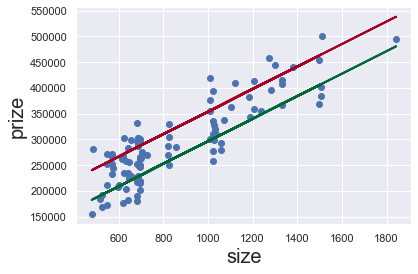

In [14]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['size'],y)
# Define the two regression equations, depending on whether the houses have a good sea view (Sea view), or didn't (No sea view)
yhat_Noseaview = 7.748e+04 + 218.7521*data['size']
yhat_Seaview = 135040.0 + 218.7521*data['size']
# Plot the two regression lines
fig = plt.plot(data['size'],yhat_Noseaview, lw=2, c='#006837')
fig = plt.plot(data['size'],yhat_Seaview, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('size', fontsize = 20)
plt.ylabel('prize', fontsize = 20)
plt.show()

## We can color the data based on sea view

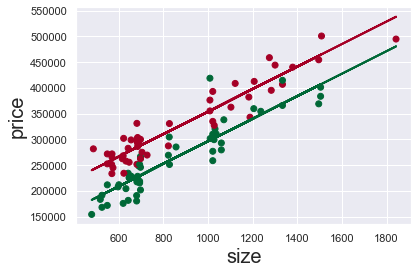

In [15]:
# In this code I want to colour the points depending on view
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['size'],data['price'], c=data['view'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_Noseaview = 7.748e+04 + 218.7521*data['size']
yhat_Seaview = 135040.0 + 218.7521*data['size']

# Plot the two regression lines
fig = plt.plot(data['size'],yhat_Noseaview, lw=2, c='#006837')
fig = plt.plot(data['size'],yhat_Seaview, lw=2, c='#a50026')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show()

## Making predictions

In [16]:
# Let's see what's inside the independent variable. 
# The first column comes from the 'add_constant' method. It's only 1s, told ya! 
x

,const,size,view
0,1.0,643.09,0
1,1.0,656.22,0
2,1.0,487.29,1
3,1.0,1504.75,0
4,1.0,1275.46,1
...,...,...,...
95,1.0,549.80,1
96,1.0,1037.44,0
97,1.0,1504.75,0
98,1.0,648.29,0


In [17]:
# Create a new data frame, identical in organization to X.
# The constant is always 1, while each of the lines corresponds to an observation (student)
new_data = pd.DataFrame({'const': 1,'size': [1020, 950], 'view': [0, 1]})
# By default, when you create a df (not load, but create), the columns are sorted alphabetically
# So if we don't reorder them, they would be 'Attendance', 'const', 'SAT'
# If you feed them in the wrong order, you will get wrong results!
new_data = new_data[['const','size','view']]
new_data

,const,size,view
0,1,1020,0
1,1,950,1


In [18]:
# I am renaming the indices for the purposes of this example.
# That's by not really a good practice => I won't overwrite the variable.
# If I want to use NumPy, sklearn, etc. methods on a df with renamed indices, they will simply be lost
# and returned to 0,1,2,3, etc.
new_data.rename(index={0: 'A bigger house with no sea view',1:'A relatively smaller house with a good sea view'})

,const,size,view
A bigger house with no sea view,1,1020,0
A relatively smaller house with a good sea view,1,950,1


In [19]:
# Use the predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions

0    300611.451566
1    342858.653350
dtype: float64